![title](../img/cover.png)

In [19]:
import shapefile as shp
import matplotlib.pyplot as plt
from  obspy import read
import numpy as np
import geopy
import geopy.distance
%matplotlib notebook

# Mision
En esta prácticamos vamos a localizar un sismo ocurrido en el Golfo de California. Utilizando el método de polarización de onda. Teoricamente, es posible licalizar un sismo utilizando una estación y sus tres componentes. 
# Parte 1
El Servicio Sismológico Nacional cuenta con una red de estaciones que permiten el monitoreo en tiempo real de los sismos que ocurren en el pais. El 5 de mayo del 2020, reportaron un sismo de magnitud M6.2, ocurrido al sur del Golfo de California. En está práctica vamos a analizar los registros sísmicos de 3 estaciones ubicadas en: (1) Chamela, Jalísco, (2) Mazatlán, Sinaloa y (3) en La Paz, Baja California Sur. Los códigos de estación de estos sensores es **CJIG**, **MAIG**, **LPIG**. 
# Localización del sismo y las estaciones
1. Utiliza el catalogo del Servicio Sismológico Nacional (http://www2.ssn.unam.mx:8080/catalogo/) y busca en el catálogo los datos de este sismo. Guarda la localización del sismo en las siguientes variables.
    - Latitud. **evla**
    - Longitud. **evlo**
    - Profundidad. **Depth** <br><br>
2. Consulta el mapa de estaciones (http://www.ssn.unam.mx/acerca-de/estaciones/) y determina la localización de cada una de las estaciones. Guarda el valor en la siguientes variable.
    - (Estación)_lat. Latitud.
    - (Estación)_lon. Longitud. <br>
    
3. Examina la función **plot_map_mexico()**. ** *Nota.* ** Existen numerosas librerias dedicadas a la graficación de mapas. En esta práctica utilizaremos una forma muy simple de grafícar, veremos librerías más completas en próximos ejercicios. 

<IPython.core.display.Javascript object>


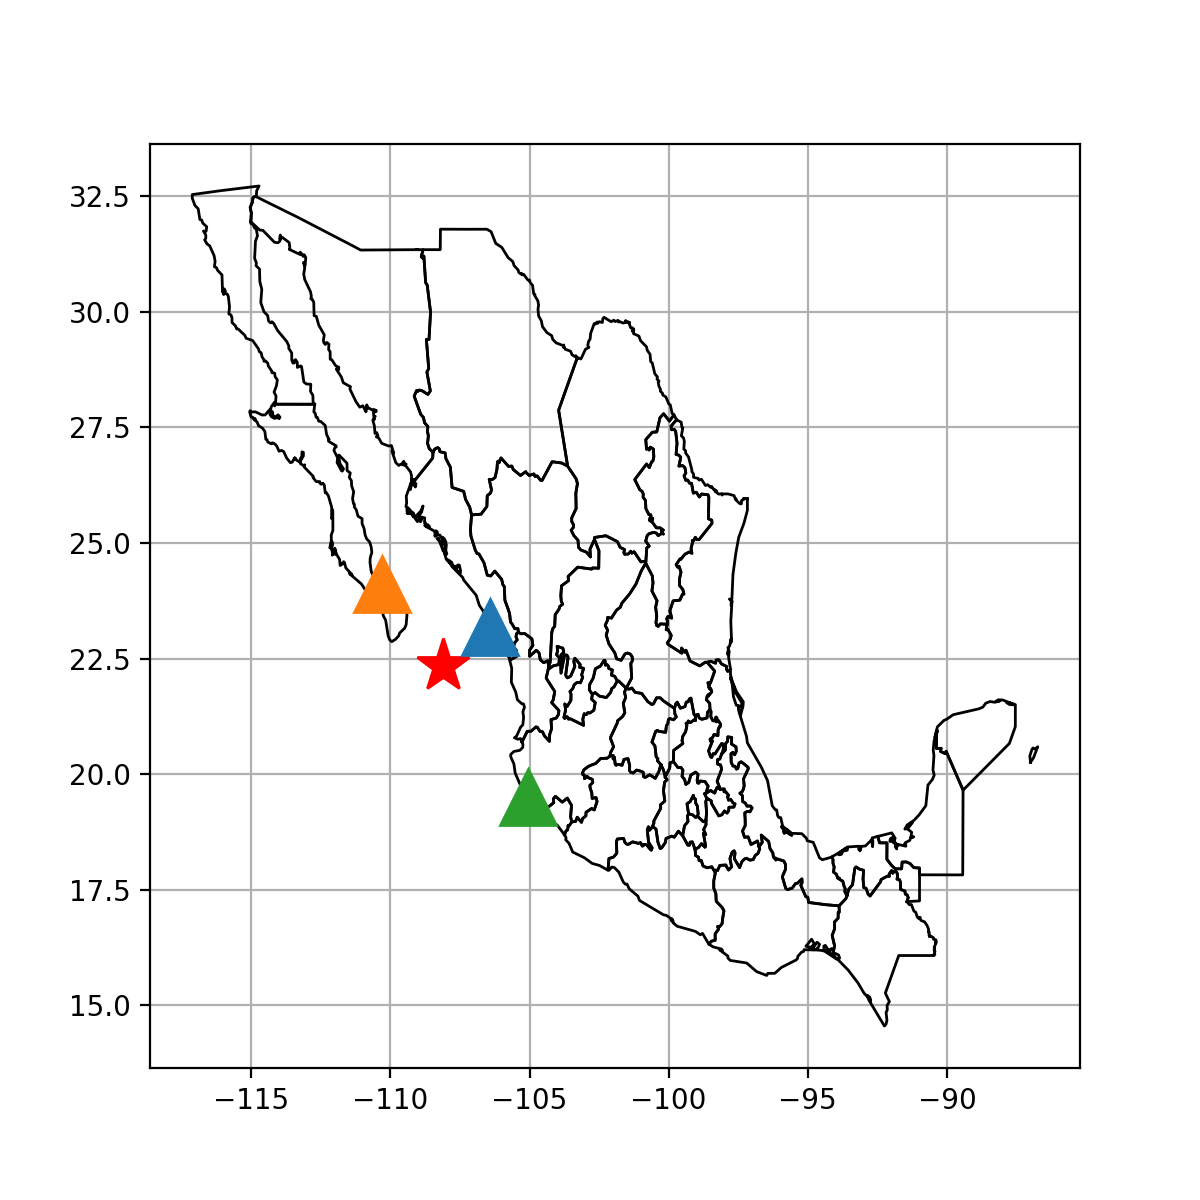

In [2]:

# Datos del sismo ~3 líneas
evla  = None
evlo  = None
depth = None

# Datos de las estaciones ~6 líneas
CJIG_lat = None
CJIG_lon = None

LPIG_lat = None
LPIG_lon = None

MAIG_lat = None
MAIG_lon = None

def plot_map_mexico():
    mexico=shp.Reader("./MX_STATE.SHP")
    plt.figure(figsize=(6,6))
    for shape in mexico.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y,'k',lw=1)
    plt.plot(evlo, evla, 'r*',markersize=20)
    plt.plot(MAIG_lon, MAIG_lat, '^',markersize=20)
    plt.plot(LPIG_lon, LPIG_lat, '^',markersize=20)
    plt.plot(CJIG_lon, CJIG_lat, '^',markersize=20)
    plt.grid()
    plt.show()

plot_map_mexico()


# Selección de la onda P y la onda S.
La siguientes celdas las tendrás que ejecutar de forma iterativa. Para cada estación selecciona la llegada de la onda P y la onda S. Para ello una vez que ejecutes tu celda deberás de inferir grafícamente los tiempos de arribo, utilizando tuu cursor y leyendo el número que aparece en la esquina inferior derecha. Te recomiendo modificar la variable **zoom** para modificar el límite superior y sea más fácil de visualizar. 

<IPython.core.display.Javascript object>


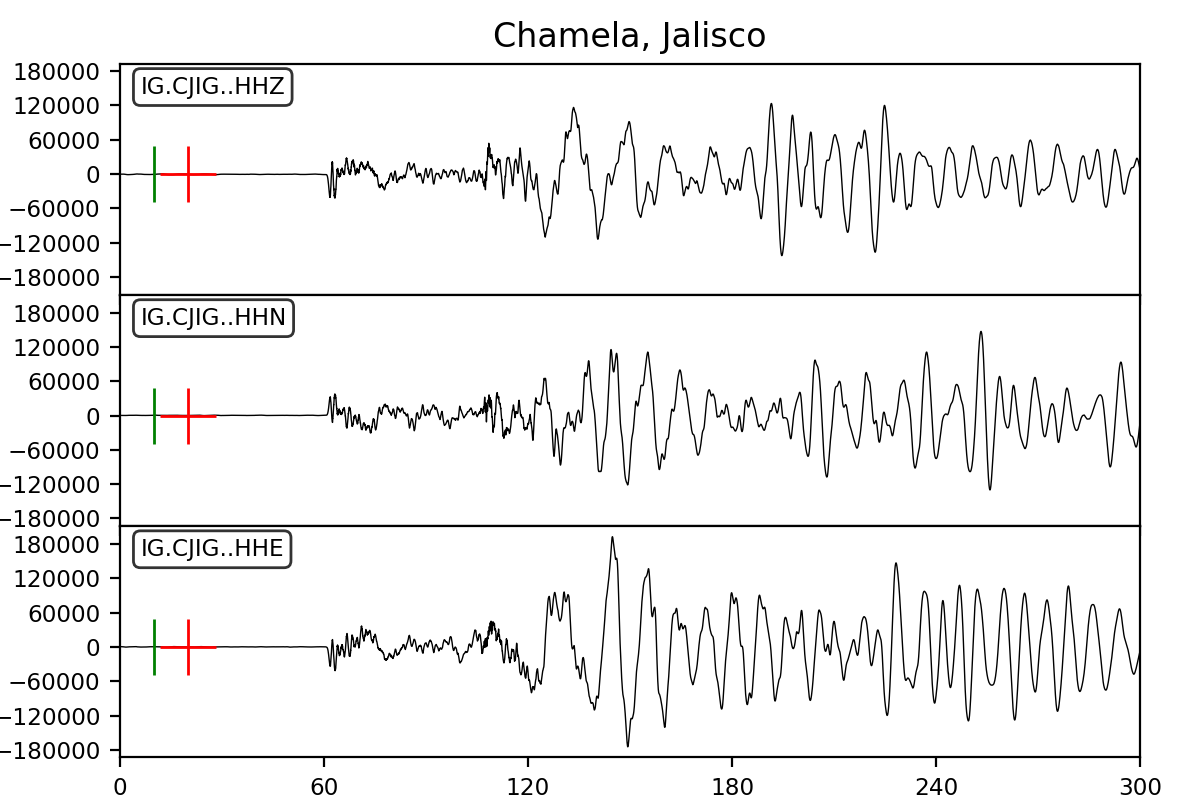

In [22]:
f1=plt.figure(figsize=(6,4))

# Editar ~3 líneas
P1   = 10 
S1   = 20 
zoom = 300 # Opcional

CJIG  = read('20200522084606.IG.CJIG.HHZ.sac')
CJIG += read('20200522084606.IG.CJIG.HHN.sac')
CJIG += read('20200522084606.IG.CJIG.HHE.sac')
ax=CJIG.plot(type='relative', linewidth=0.5, grid_linestyle='-',
             fig=f1, handle=True,  endtime=CJIG[0].stats.starttime + zoom);
df    = CJIG[0].stats.sampling_rate

ax1, ax2, ax3=ax.get_axes()
ax1.plot(P1,0,'g|',markersize=20, lw=2)
ax2.plot(P1,0,'g|',markersize=20, lw=2)
ax3.plot(P1,0,'g|',markersize=20, lw=2)
ax1.set_title('Chamela, Jalisco')

ax1.plot(S1,0,'r+',markersize=20, lw=2)
ax2.plot(S1,0,'r+',markersize=20, lw=2)
ax3.plot(S1,0,'r+',markersize=20, lw=2)


<IPython.core.display.Javascript object>


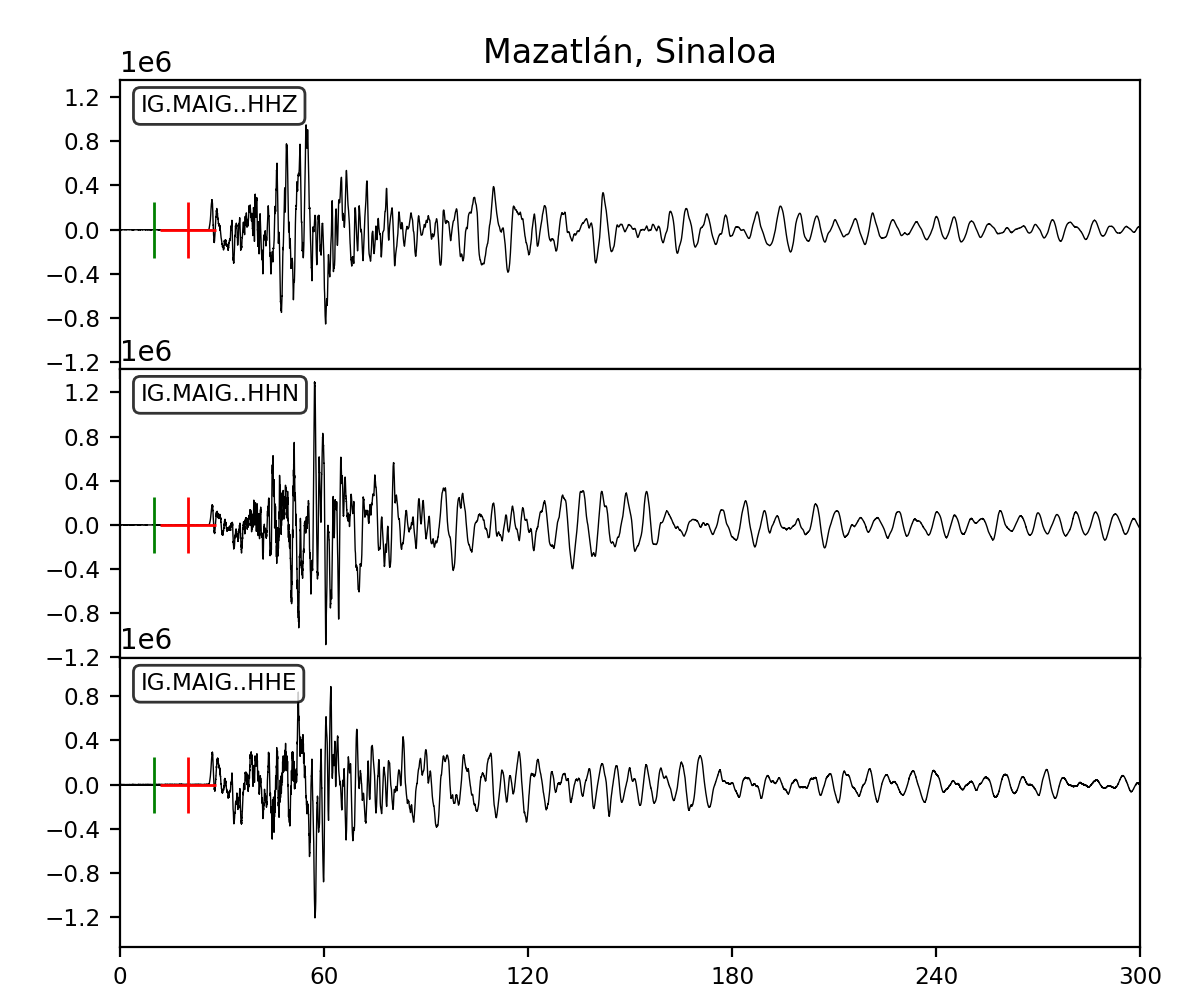

In [23]:
f1=plt.figure(figsize=(6,5))

# Editar ~3 líneas
P2 = 10 
S2 = 20
zoom = 300

MAIG  = read('20200522084606.IG.MAIG.HHZ.sac')
MAIG += read('20200522084606.IG.MAIG.HHN.sac')
MAIG += read('20200522084606.IG.MAIG.HHE.sac')
ax=MAIG.plot(type='relative', linewidth=0.5, grid_linestyle='-', 
             fig=f1, handle=True, endtime=CJIG[0].stats.starttime + zoom);
df    = MAIG[0].stats.sampling_rate

ax1, ax2, ax3=ax.get_axes()
ax1.plot(P2,0,'g|',markersize=20, lw=2)
ax2.plot(P2,0,'g|',markersize=20, lw=2)
ax3.plot(P2,0,'g|',markersize=20, lw=2)
ax1.set_title('Mazatlán, Sinaloa')


ax1.plot(S2,0,'r+',markersize=20, lw=2)
ax2.plot(S2,0,'r+',markersize=20, lw=2)
ax3.plot(S2,0,'r+',markersize=20, lw=2)


<IPython.core.display.Javascript object>


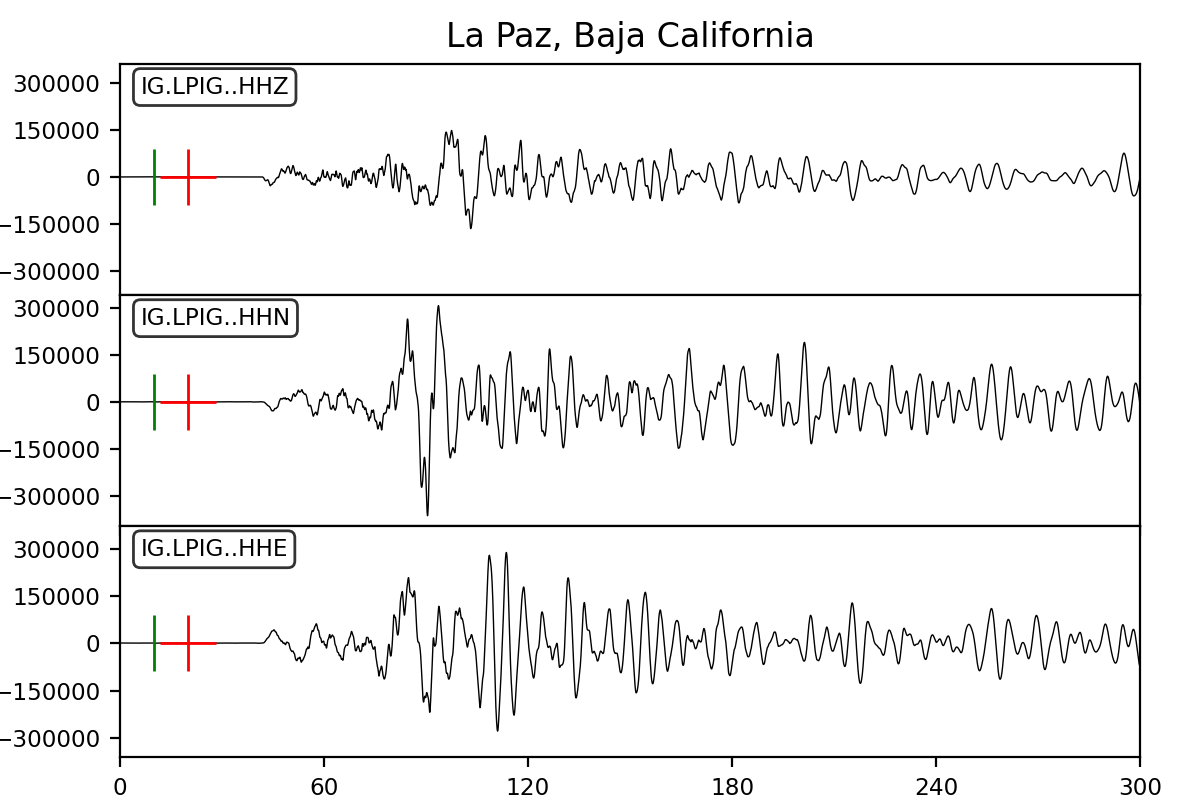

In [24]:
f1=plt.figure(figsize=(6,4))

# Editar ~3 líneas
P3 = 10
S3 = 20
zoom = 300

LPIG  = read('20200522084606.IG.LPIG.HHZ.sac')
LPIG += read('20200522084606.IG.LPIG.HHN.sac')
LPIG += read('20200522084606.IG.LPIG.HHE.sac')
ax=LPIG.plot(type='relative', linewidth=0.5, grid_linestyle='-',
             fig=f1, handle=True, endtime=CJIG[0].stats.starttime + zoom);
df    = CJIG[0].stats.sampling_rate

ax1, ax2, ax3=ax.get_axes()
ax1.plot(P3,0,'g|',markersize=20, lw=2)
ax2.plot(P3,0,'g|',markersize=20, lw=2)
ax3.plot(P3,0,'g|',markersize=20, lw=2)
ax1.set_title('La Paz, Baja California')


ax1.plot(S3,0,'r+',markersize=20, lw=2)
ax2.plot(S3,0,'r+',markersize=20, lw=2)
ax3.plot(S3,0,'r+',markersize=20, lw=2)

# Polarización de la onda y movimiento de la partícula
A continuación vamos a tomar un pequeña ventana de tiempo después de la llegada de la **onda P** con duración de *t* segundos. Dependiendo de la distancia al sismo la duración puede variar de una fracción de segundo para sismos muy cercanos a unos cuantos segundos para sismos regionales. En nuestro caso, 2-3 segundos es un tiempo suficiente para determinar la polarización de la onda. Prueba diferentes ventanas de tiempo que te permitan obtener una polarización de la onda cercana a una línea recta. 

L:  300


<IPython.core.display.Javascript object>


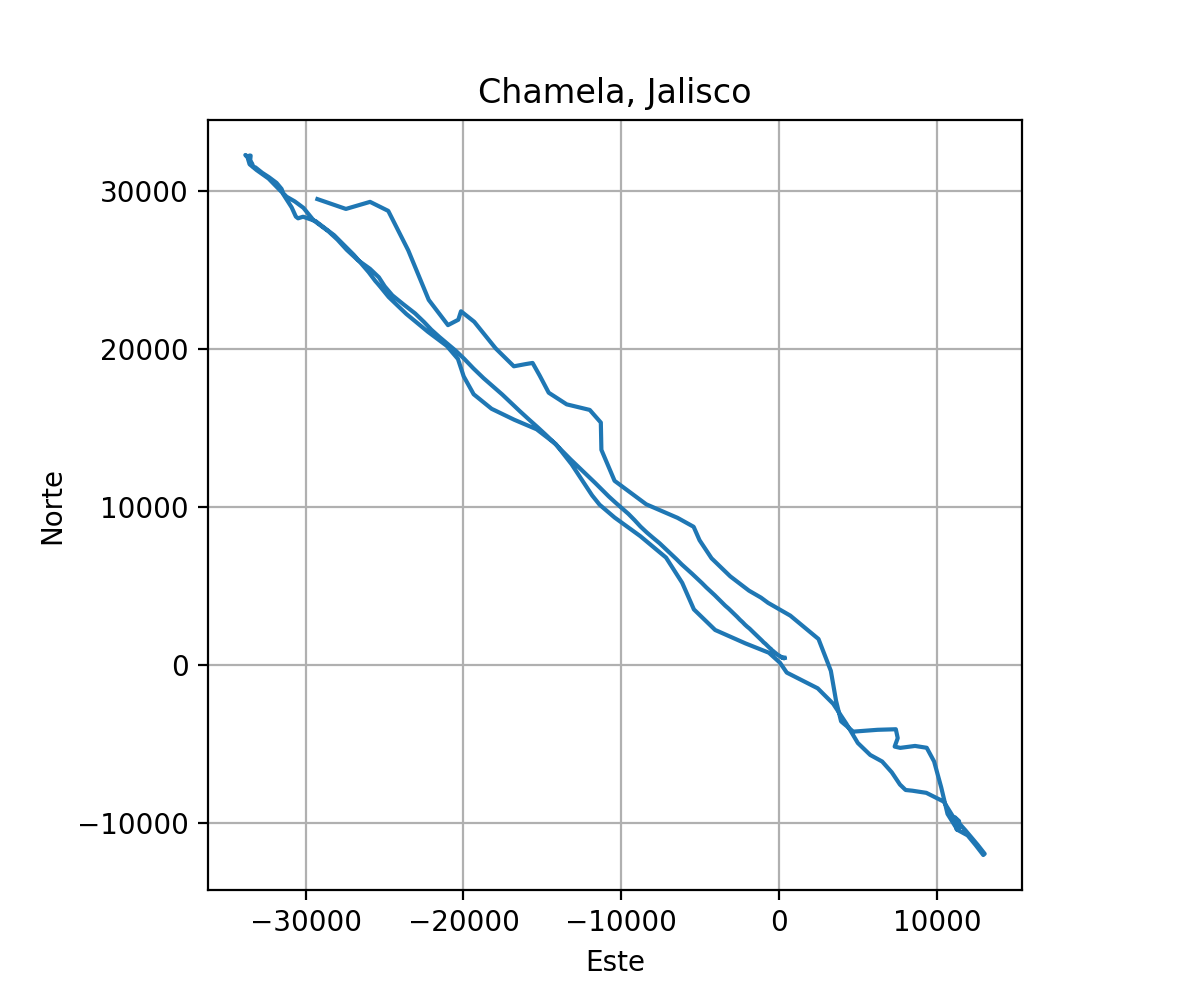

60


In [11]:

# Escribe tu código aquí. ~1 línea
win_t     = None
win       = int(win_t*df)
P1_sample = int(P1*df)
Norte1 = CJIG[1].data[P1_sample:P1_sample + win]
Este1  = CJIG[2].data[P1_sample:P1_sample + win]
print('L: ',len(Norte1))
f1=plt.figure(figsize=(6,5))
plt.plot(Este1, Norte1)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('Este')
plt.ylabel('Norte')
plt.title('Chamela, Jalisco')
print(P1)

L:  300


<IPython.core.display.Javascript object>


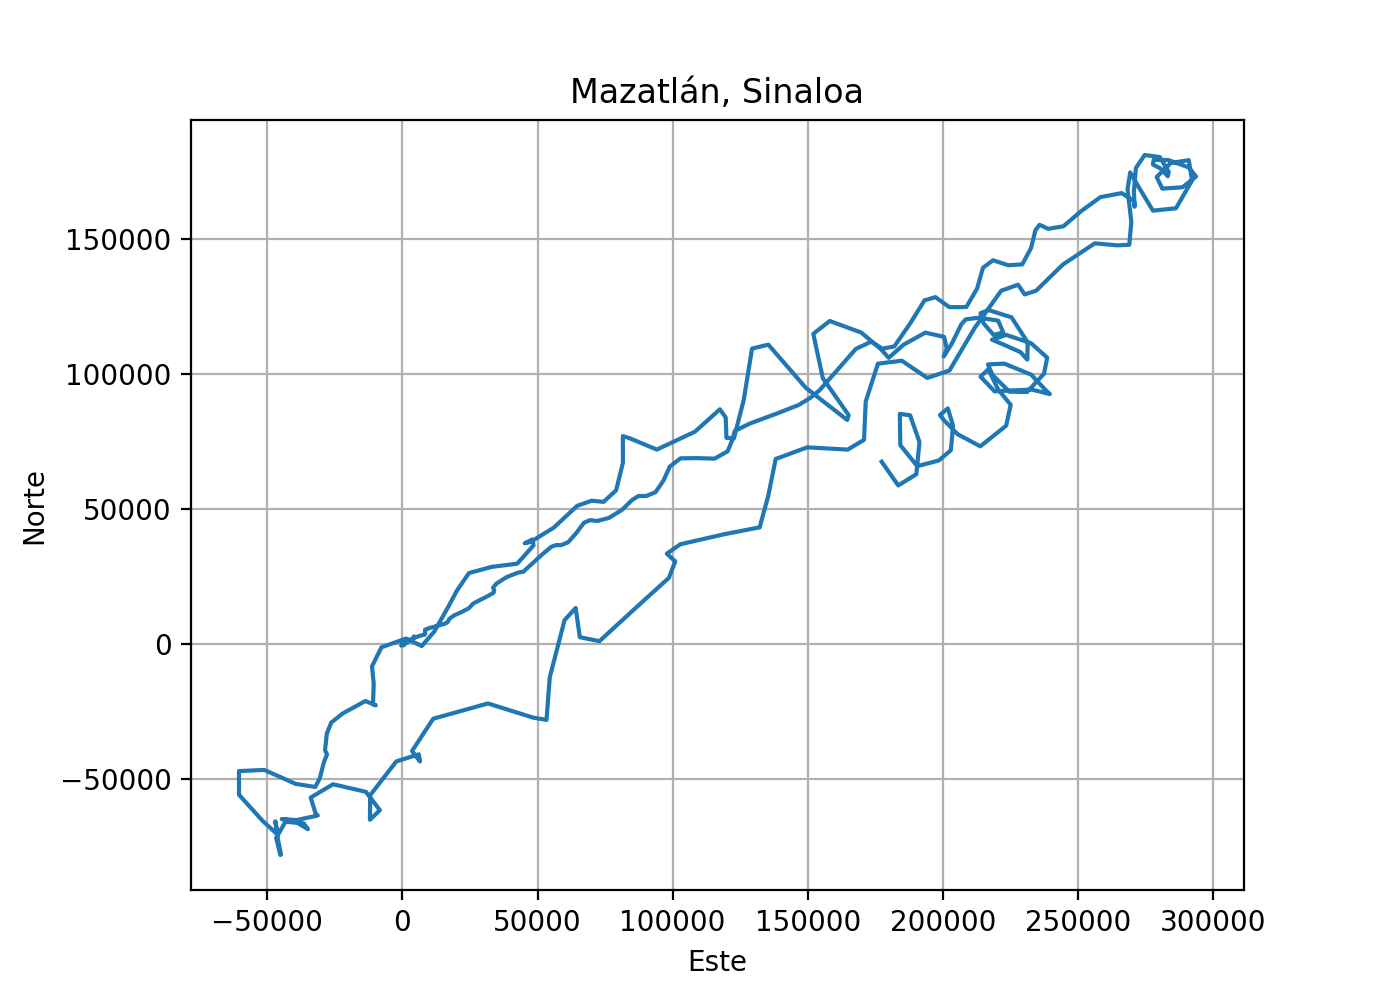

60


In [12]:
# Escribe tu código aquí. ~1 línea
win_t     = None

P2_sample = int(P2*df)
win       = int(win_t*df)
Norte2 = MAIG[1].data[P2_sample:P2_sample + win]
Este2  = MAIG[2].data[P2_sample:P2_sample + win]
print('L: ',len(Norte2))
f1=plt.figure(figsize=(7,5))
plt.plot(Este2, Norte2)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('Este')
plt.ylabel('Norte')
plt.title('Mazatlán, Sinaloa')
print(P1)

L:  300


<IPython.core.display.Javascript object>


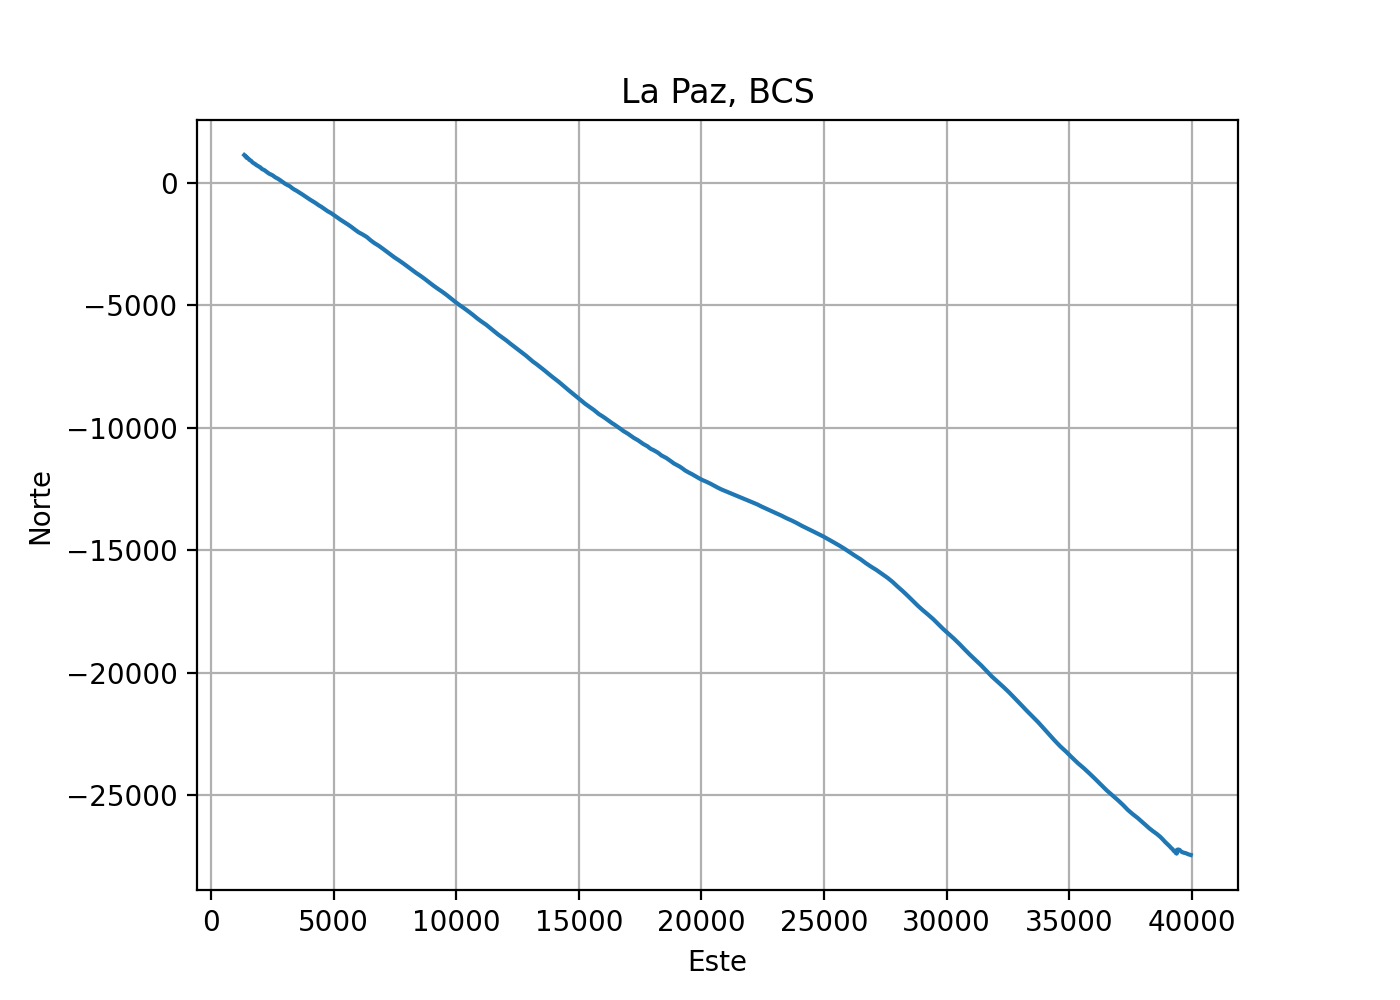

60


In [17]:
# Escribe tu código aquí. ~1 línea
win_t     = None

P3_sample = int(P3*df)
win       = int(win_t*df)
Norte3 = LPIG[1].data[P3_sample:P3_sample + win]
Este3  = LPIG[2].data[P3_sample:P3_sample + win]
print('L: ',len(Norte3))
f1=plt.figure(figsize=(7,5))
plt.plot(Este3, Norte3)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlabel('Este')
plt.ylabel('Norte')
plt.title('La Paz, BCS')
print(P1)

# Distancia al sismo 
La distancia al sismos se puede calcular a través de la diferencia entre el tiempo de llegada de la **onda S**, *$t_s$* y la **onda P**, *$t_p$*. Por lo tanto si conocemos la velocidad promedio de la onda, y el tiempo de arribo podemos conocer la distancia, $d$, de la siguiente forma. Sea,
$$
\begin{eqnarray}
t_p&=&\frac{d}{V_p},\\
t_s&=&\frac{d}{V_s}.
\end{eqnarray}
$$<br>
Por lo tanto,
$$
\begin{equation}
t_s - t_p = d\left(\frac{1}{V_p}-\frac{1}{V_s}\right).
\end{equation}
$$<br>
Obtén una ecuación para calcular las distancias del sismo a las estaciones, **d1**, **d2** y **d3** en **kilómetros**. La velocidad promedio de la **onda P (P1, P2, P3)** en la corteza es $V_p=4.73km/s$. Asume que la corteza es un medio de Poisson para calcular la velocidad de la **onda S (S1, S2, S3)**. 

In [39]:
# Estimate distancias
# Escrribe tu código aquí. ~3 líneas
vp = 4.73
d1 = None
d2 = None
d3 = None
print('Distancia a la estación Chamela  (CJIG):', '{:.2f}'.format(d1), ' km.')
print('Distancia a la estación Mazatlán (MAIG):', '{:.2f}'.format(d2), ' km.')
print('Distancia a la estación La Paz   (LPIG):', '{:.2f}'.format(d3), ' km.')

Distancia a la estación Chamela  (CJIG): 400.60  km.
Distancia a la estación Mazatlán (MAIG): 180.92  km.
Distancia a la estación La Paz   (LPIG): 232.61  km.


# Cálculo de la dirección de propagación
Como vistes en secciones anteriores, los diagramas de movimiento de partícula indican de la cual provienen una onda sísmica En esta sección vamos a aplicar el método de descomposición de valores singulares para determinar esta dirección a través del cálculo de los eigen valores y los eigenvectores. La matriz que contiene la dirección de la partícula se puedes descomponer de la siguiente forma,<br><br>
$$
\begin{equation}
A=U\Sigma V^*.
\end{equation}
$$<br>
Donde $A$ es una matriz de $m$ reglones (número de puntos) y dos columnas que contienen el movimiento de la partícula en la dirección $x$ (Este) y $y$ (Norte). La matrices $U$ y $V^*$ corresponden a rotaciones del sistema de coordenadas y la matriz $\Sigma$ es una matriz diagonal que contiene los eigenvalores de la función. Para determinar la dirección de propagación vamos a obtene la fase del eigenector que correstonde al eigenvalos de mayor magnitud. 

In [20]:
# Estimate dirección
dir_CJIG = np.transpose(np.vstack(((Este1,Norte1))))
_, _, v1 = np.linalg.svd(dir_CJIG)
dir_vec1 = v1[0,:]

# Estimate dirección
print('Shape: ', dir_CJIG.shape)
dir_MAIG = np.transpose(np.vstack(((Este2,Norte2))))
_, _, v2 = np.linalg.svd(dir_MAIG)
dir_vec2 = v2[0,:]

# Estimate dirección
dir_LPIG = np.transpose(np.vstack(((Este3,Norte3))))
_, _, v3 = np.linalg.svd(dir_LPIG)
dir_vec3 = v3[0,:]
bearing_CJIG = np.degrees(np.arctan2(dir_vec1[1], dir_vec1[0]))
bearing_MAIG = np.degrees(np.arctan2(dir_vec2[1], dir_vec2[0]))
bearing_LPIG = np.degrees(np.arctan2(dir_vec3[1], dir_vec3[0]))
print("direction = ", bearing_CJIG, "deg de la estación CJIG.")
print("direction = ", bearing_MAIG, "deg de la estación MAIG.")
print("direction = ", bearing_LPIG, "deg de la estación LPIG.")

Shape:  (300, 2)
direction =  135.788 deg de la estación CJIG.
direction =  -150.377 deg de la estación MAIG.
direction =  147.093 deg de la estación LPIG.


# 180˚ ambiguedad
La polarizazión de la **onda P** da como resultado dos posibles direcciones de las cuales pudo haber provenido el sismo. Para resolver este problema es necesario analizar la polaridad del primer arribo de la onda P, en la componente vertical. Si la polaridad de la componente vertical es hacia arriba, significa que el vector de deslazamiento apunta en el sentido opuesto a la dirección de la fuente. Por el Contrario, si es hacia abajo, significa que el vector de desplazamiento apunta hacia la fuente. <br>
Pro ejemplo, vamos a asumir que después de analizar el movimiento de la partícula, sabemos que la dirección de la cual pudo provenir el sismo es NE/SW. En este punto, sabemos que el sismo vino de la dirección NE o SW, pero no sabemos cual.  Para resolverlo necesitamos observar detenidamente a la polaridad de la llegada de la primeras fases horizontales. Pueden ser que las dos sean positivas o las dos negativas. Supongamos que en este caso las dos son positivas, es decir el primer arribo apunta en la dirección NE. Debido a la ruptura del sismo puede ser ya sea compresión o dilatación. Si suponemos que todas las componentes son positivas, en este caso selecionariamos la dirección SW. 
Analiza tus diagramas y su lo consideras necesario añade 180 grados a la variable bearing_STA, utilizando las variables **disamb_1**, **disamb_2** y **disamb_3**. Es decir, asigna el valor 0 o 180 según consideres conveniente. 

<IPython.core.display.Javascript object>


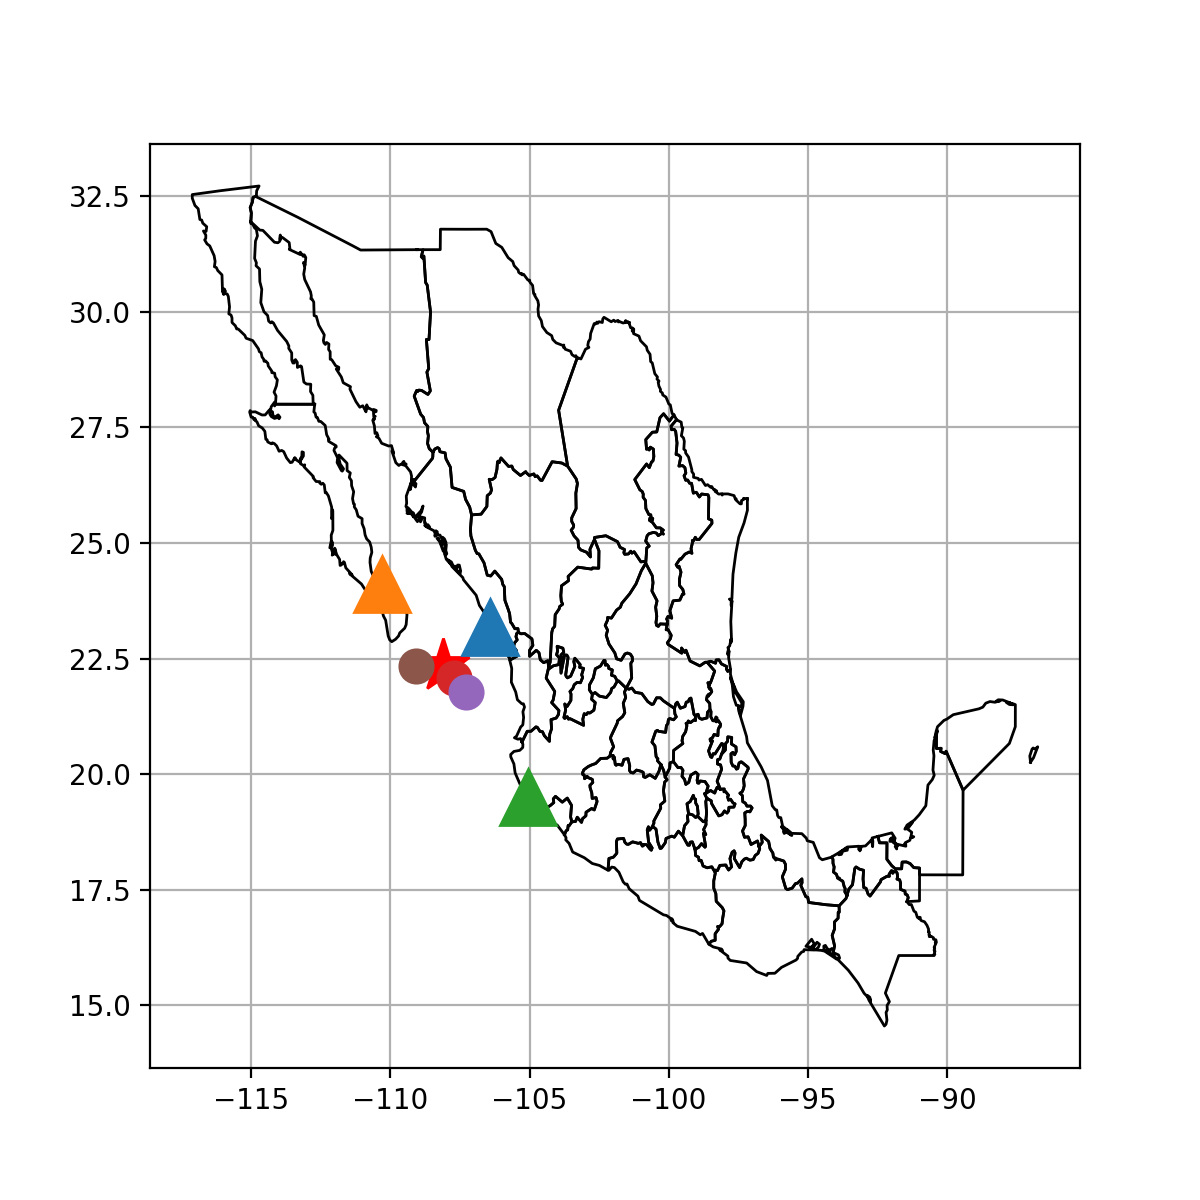

In [58]:
plot_map_mexico()
# Escribe tu código aqui ~3 líneas
disamb_1 = None
disamb_2 = None
disamb_3 = None

CJIG_sta = geopy.Point(CJIG_lat, CJIG_lon)
MAIG_sta = geopy.Point(MAIG_lat, MAIG_lon)
LPIG_sta = geopy.Point(LPIG_lat, LPIG_lon)

CJIG_d   = geopy.distance.great_circle(kilometers = d1)
MAIG_d   = geopy.distance.great_circle(kilometers = d2)
LPIG_d   = geopy.distance.great_circle(kilometers = d3)


CJIG_epi = CJIG_d.destination(point=CJIG_sta, bearing=bearing_CJIG + disamb_1)
MAIG_epi = MAIG_d.destination(point=MAIG_sta, bearing=bearing_MAIG + disamb_2)
LPIG_epi = LPIG_d.destination(point=LPIG_sta, bearing=bearing_LPIG + disamb_3)

plt.plot(CJIG_epi.longitude, CJIG_epi.latitude, 'o',markersize=12)
plt.plot(MAIG_epi.longitude, MAIG_epi.latitude, 'o',markersize=12)
plt.plot(LPIG_epi.longitude, LPIG_epi.latitude, 'o',markersize=12)


# Notas
En esta práctica hemos visto un método que aunque actualmente es poco utilizado debido a que en general es difícil obtener polarización lineal. Sin embargo, este método fue utilizado por muchos años para dar las primeras estimaciones de un sismo antes de la digitalización de los sistemas de monitoreo. Para el cálculo, de la distancia hemos partido del hecho de la trayectoria de propagación es recta. Esta suposición es válida cuando tenemos estaciones relativamente cerca del sismo (unos cuantos ~1-30km). Cómo veremos más adelante las ondas seismicas sigue una trayectoria parabólica y es importante considerar la curvatura de la Tierra. 